In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import time

In [2]:
df = pd.read_csv('../data/tracks_features.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


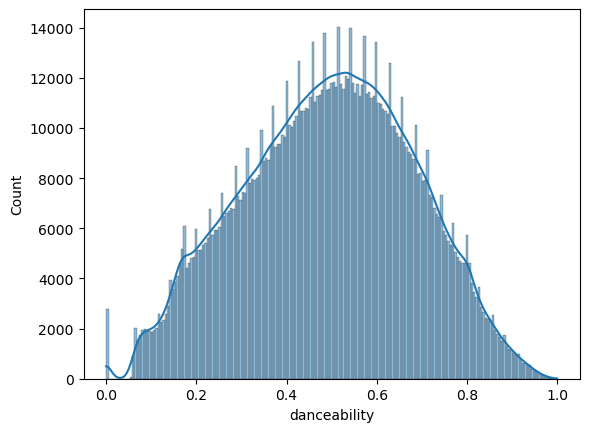

In [9]:
sns.histplot(df['danceability'], kde=True)
plt.show()

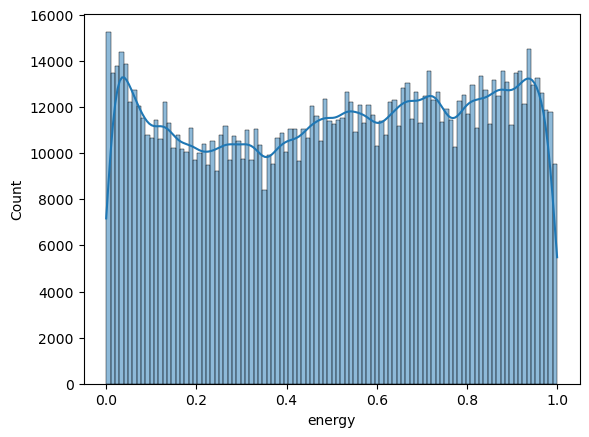

In [10]:
sns.histplot(df['energy'], kde=True)
plt.show()

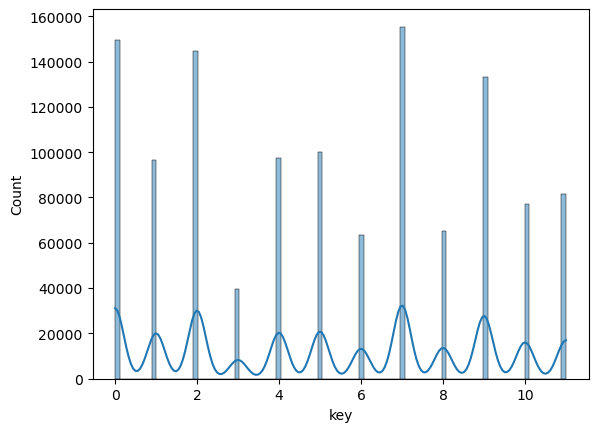

In [11]:
sns.histplot(df['key'], kde=True)
plt.show()

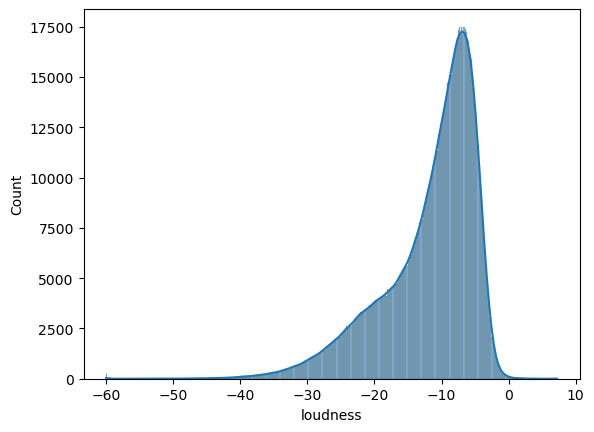

In [12]:
sns.histplot(df['loudness'], kde=True)
plt.show()

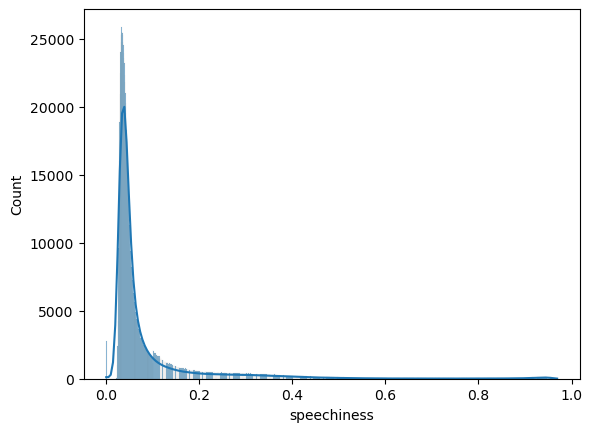

In [14]:
sns.histplot(df['speechiness'], kde=True)
plt.show()

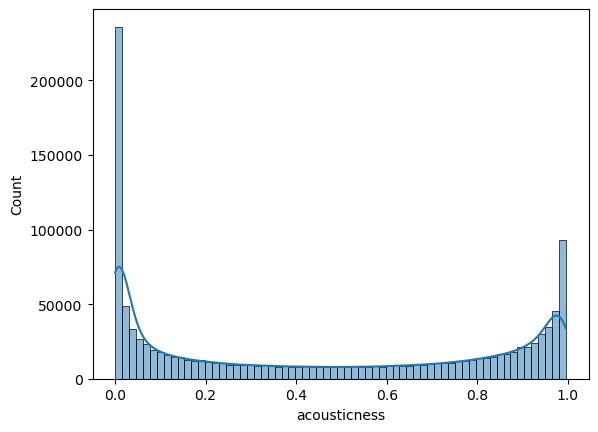

In [15]:
sns.histplot(df['acousticness'], kde=True)
plt.show()

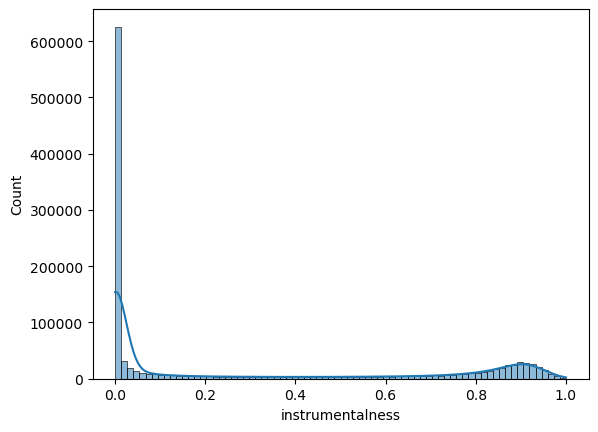

In [16]:
sns.histplot(df['instrumentalness'], kde=True)
plt.show()

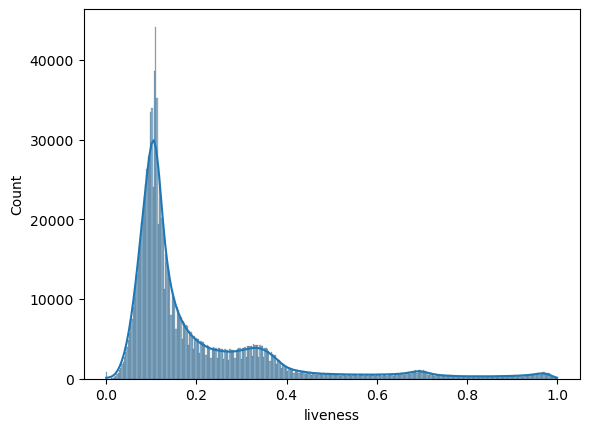

In [17]:
sns.histplot(df['liveness'], kde=True)
plt.show()

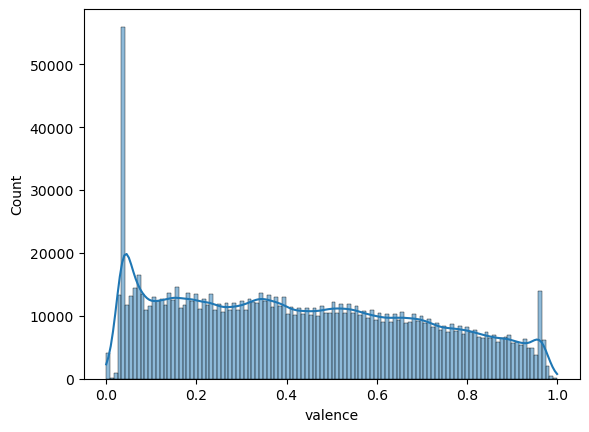

In [18]:
sns.histplot(df['valence'], kde=True)
plt.show()

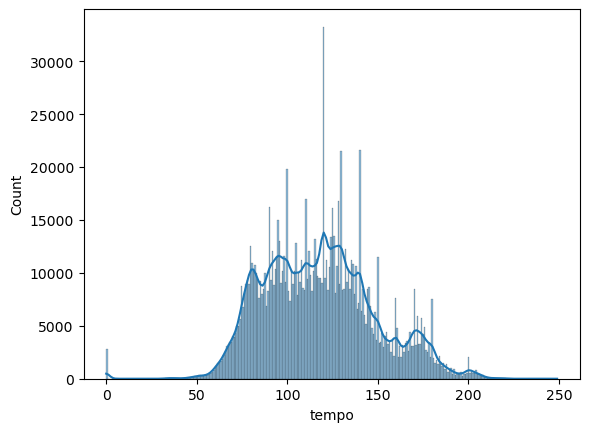

In [19]:
sns.histplot(df['tempo'], kde=True)
plt.show()

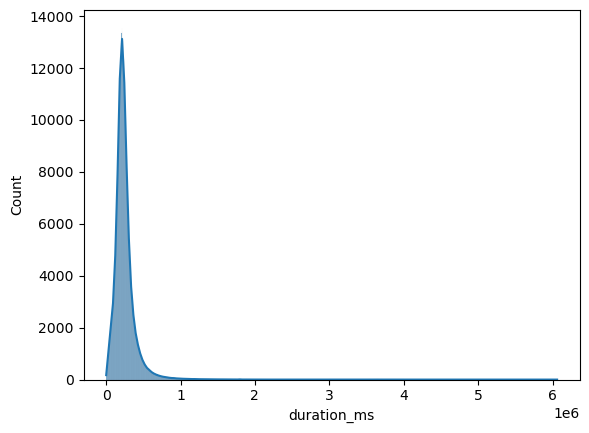

In [20]:
sns.histplot(df['duration_ms'], kde=True)
plt.show()

In [3]:
key_features = [
    'id', 'name', 'artists', 'artist_ids',
    'explicit', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature', 'year'
]

df_full = df
df = df[key_features]
numeric_df = df.select_dtypes(include=['number'])
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

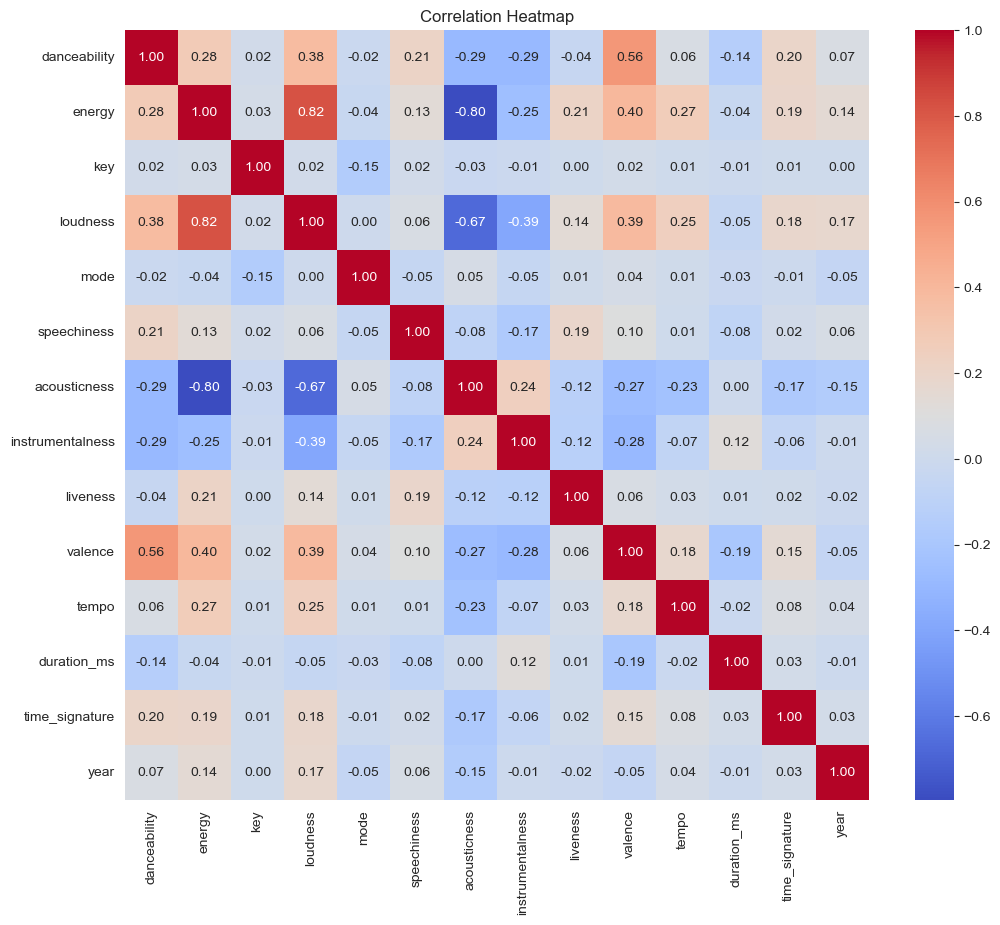

In [4]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [5]:
key_features_interesting = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

In [6]:
X = df[key_features_interesting]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

100%|██████████| 15/15 [02:46<00:00, 11.10s/it]


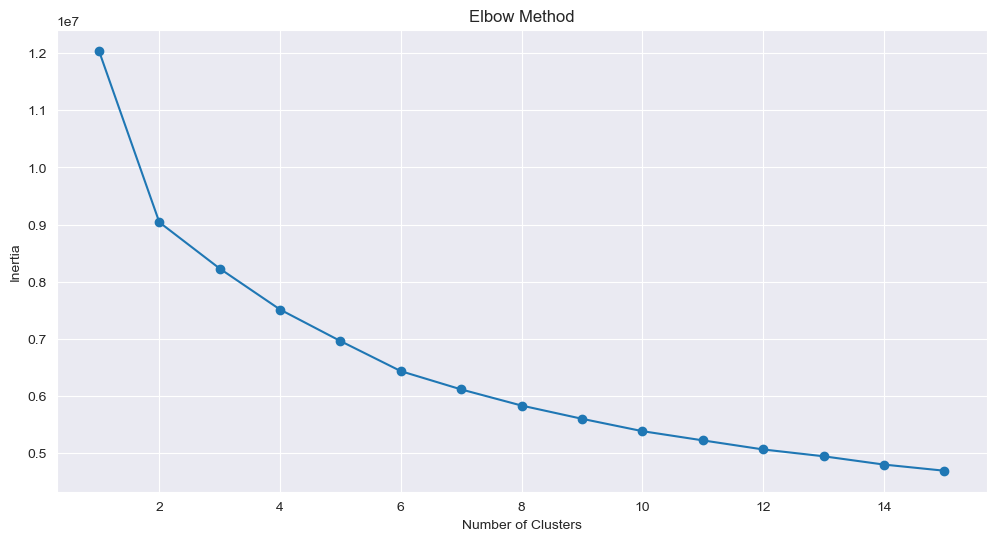

In [25]:
from tqdm import tqdm
inertia = []
for i in tqdm(range(1, 16)):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
num_clusters = 7

In [32]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # any value you prefer
df['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\kanio\AppData\Local\Temp\ipykernel_25052\2132010658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


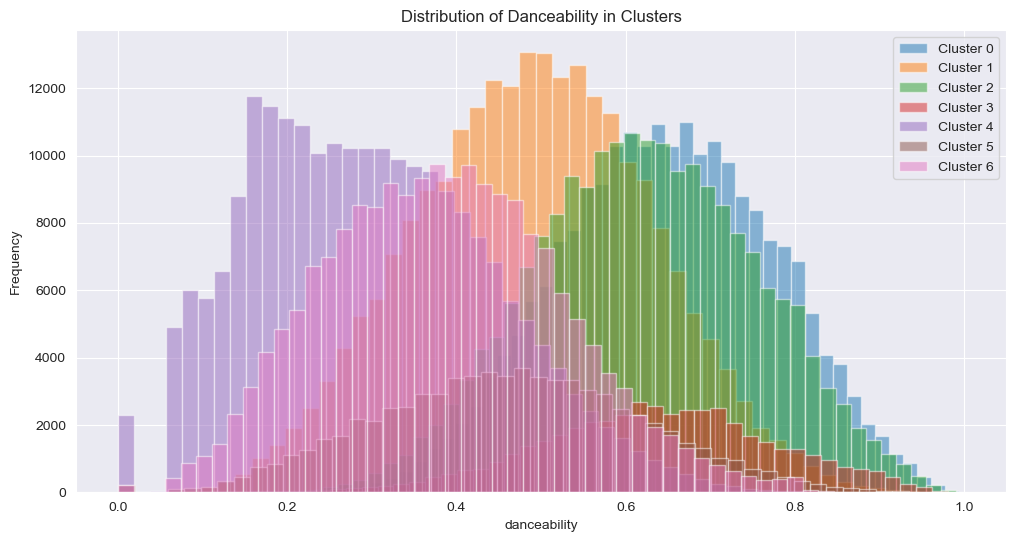

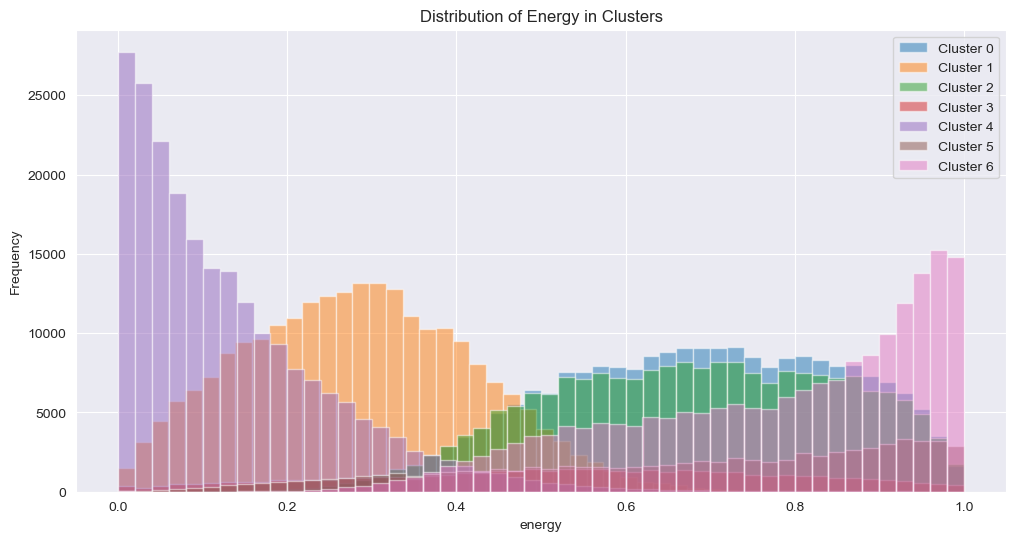

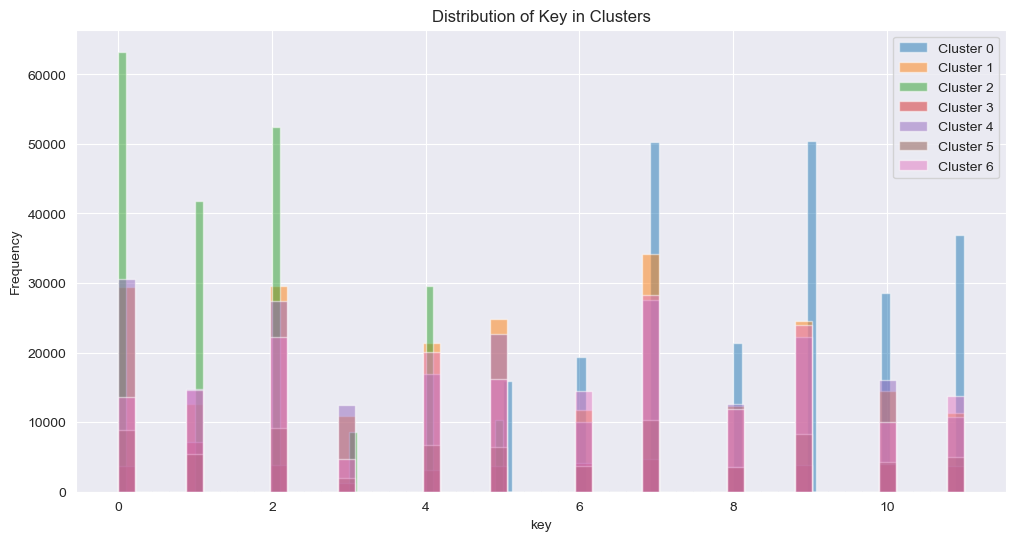

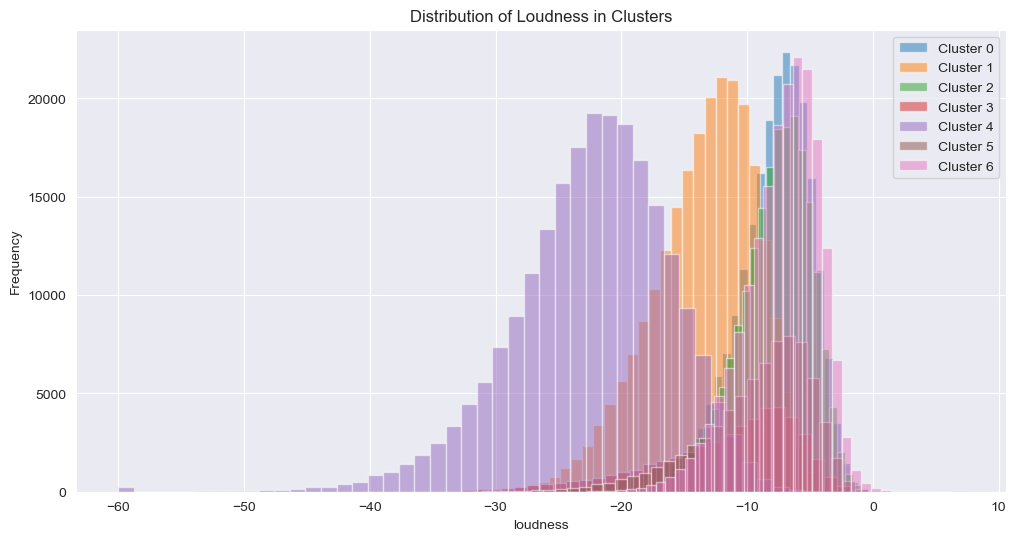

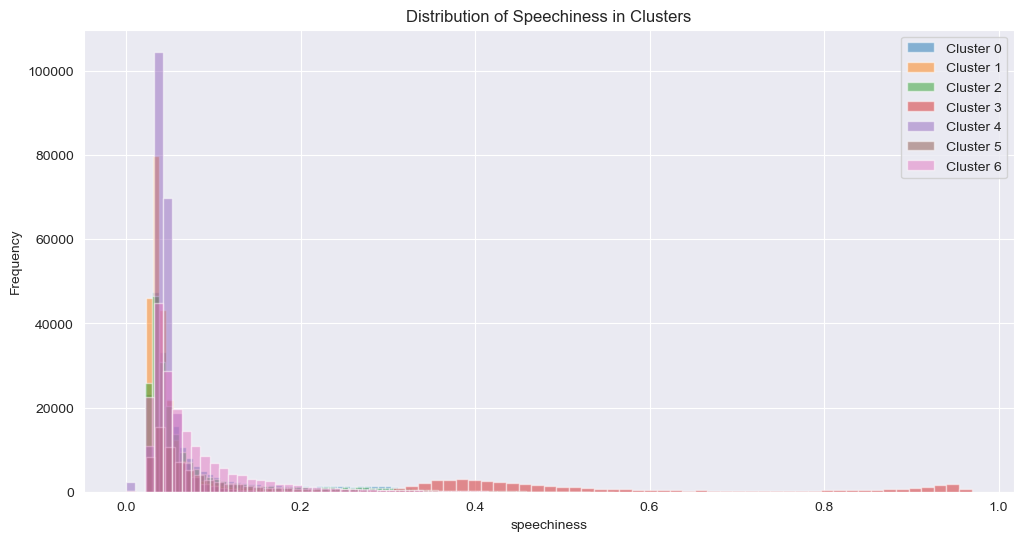

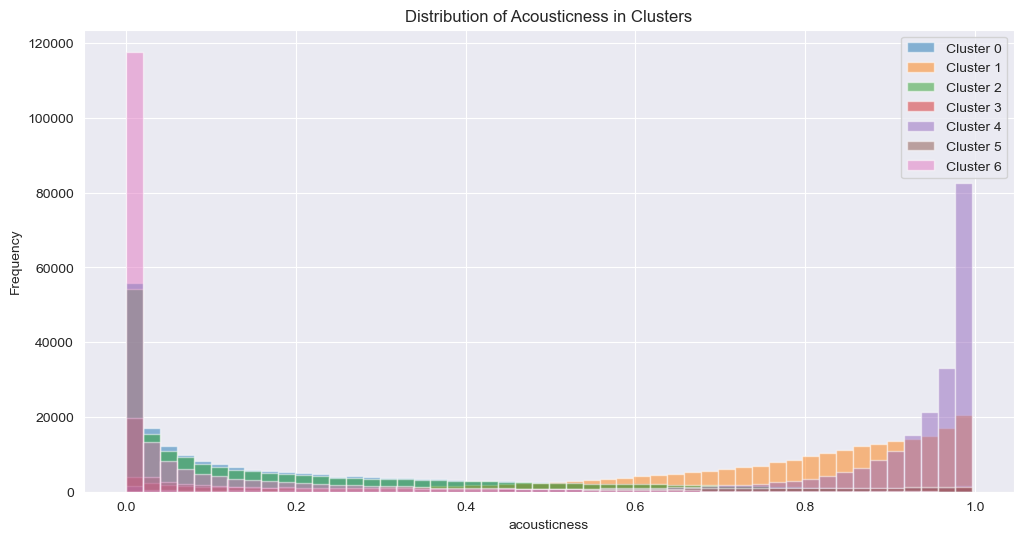

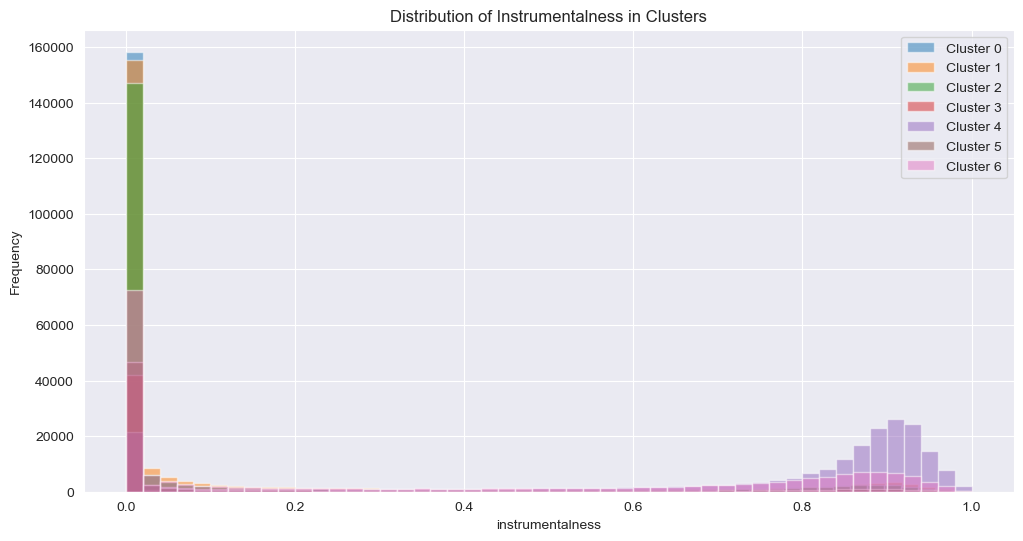

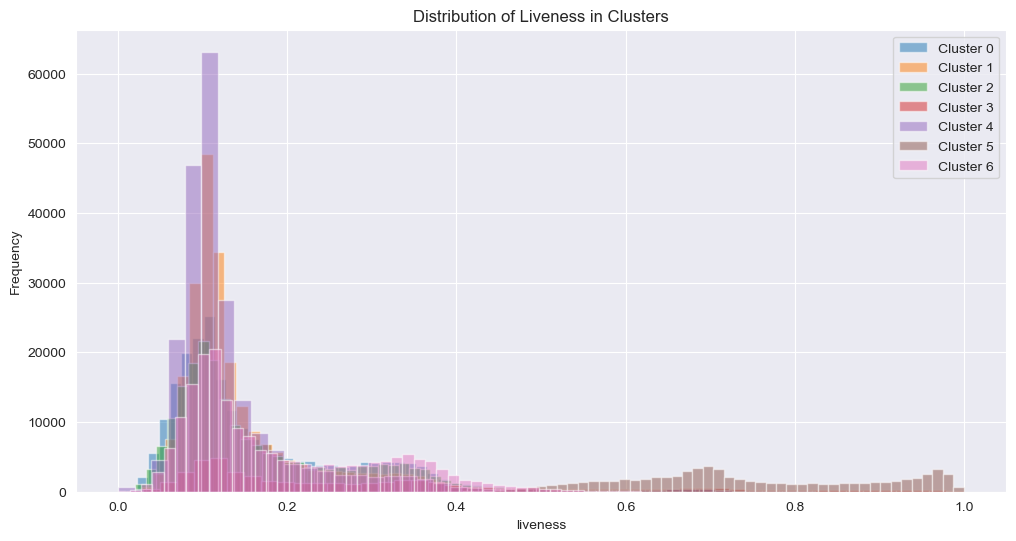

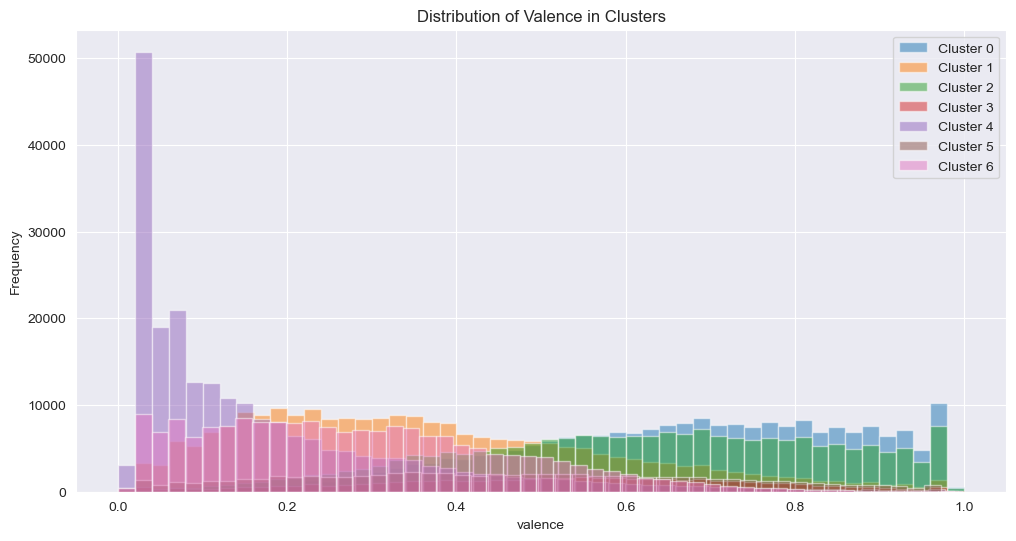

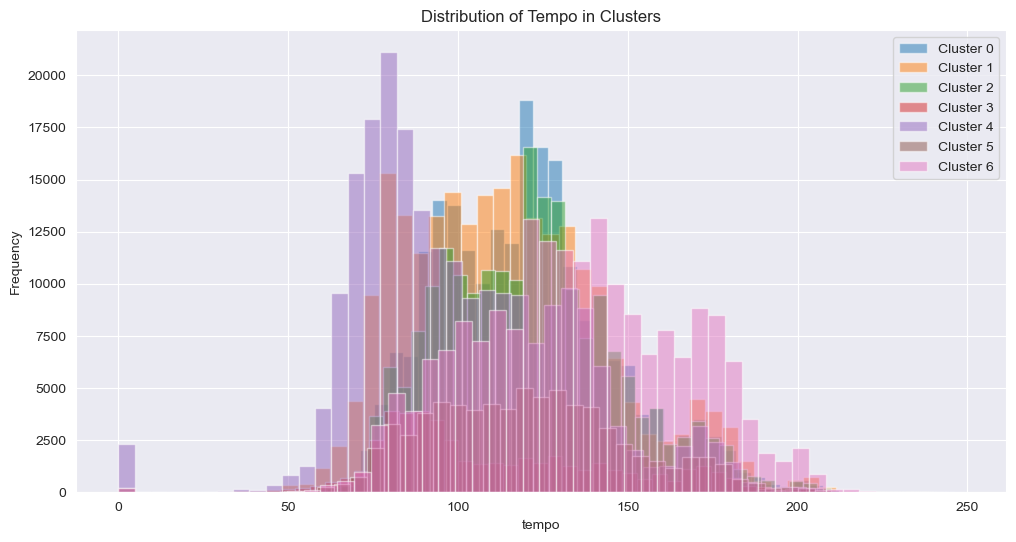

In [33]:
for feature in key_features_interesting:
    plt.figure(figsize=(12, 6))
    for cluster in range(num_clusters):
        cluster_data = df[df['cluster'] == cluster]
        plt.hist(cluster_data[feature], bins=50, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {str(feature).capitalize()} in Clusters')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [37]:
file_path = '../data/tracks_features.csv'

In [38]:
def get_sample_dataset(file_path, sample_size_needed):
    return pd.read_csv(file_path).sample(n=sample_size_needed, random_state=42)

In [39]:
# performancing process time in unix time standart
START_TIME = time.time()

sample_size = 50000  # Define the size of the sample

# Load a sample of the dataset
print("get sample dataset\n")
songs_df = get_sample_dataset(file_path, sample_size)

print("> drop duplicates")
songs_df.drop_duplicates(inplace=True)
print("* drop duplicates finish")

get sample dataset

> drop duplicates
* drop duplicates finish


In [40]:
songs_df = songs_df.dropna(subset=key_features)

In [41]:
row_count = songs_df.shape[0]
print(f"After data cleansing, there are still {row_count} records in the dataset.")

# Define desired columns to use for content-based recommendation
features = [
    'name', 'artists', 'danceability', 'energy',
    'loudness', 'tempo', 'duration_ms', 'release_date',
    'acousticness', 'speechiness'
]

# Combine selected features into a single string
songs_df['combined_features'] = songs_df[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

After data cleansing, there are still 50000 records in the dataset.


In [42]:
# TF-IDF Vectorization
print("> TF-IDF vectorizing")
tfidf = TfidfVectorizer(stop_words='english')
print("\n> TF-IDF fitting")
tfidf_matrix = tfidf.fit_transform(songs_df['combined_features'])
print("* Finish fitting\n")

# Compute the cosine similarity matrix
print("> Cosine_sim computing")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("* Cosine_sim finish\n")

> TF-IDF vectorizing

> TF-IDF fitting
* Finish fitting

> Cosine_sim computing
* Cosine_sim finish



In [43]:
END_TRAIN_TIME = time.time()

# calc duration train seconds
TRAIN_TIME = round(END_TRAIN_TIME - START_TIME, 4)

print(f"Train {row_count} records\nWith trianed time = {TRAIN_TIME} seconds")

Train 50000 records
With trianed time = 90.975 seconds


In [44]:
# Save the trained model to disk
print("> dumping tfidf")
joblib.dump(tfidf, 'tfidf_model.pkl')
print("> dumping cosine_sim")
joblib.dump(cosine_sim, 'cosine_sim_model.pkl')
print("* dumping cosine_sim finish\n")

> dumping tfidf
> dumping cosine_sim
* dumping cosine_sim finish



In [53]:
def get_recommendations(song_name, songs_df=songs_df, cosine_sim=cosine_sim, lastTop=10):
    # Check if the song name exists in the dataset
    if song_name not in songs_df['name'].values:
        return "Song not found in the dataset."

    # Get the index of the song that matches the name in the full dataset
    full_dataset_idx = songs_df[songs_df['name'] == song_name].index[0]

    # Get the corresponding index in the sampled dataset
    sampled_dataset_idx = songs_df.index.get_loc(full_dataset_idx)

    # Get the pairwise similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[sampled_dataset_idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N most similar songs
    sim_scores = sim_scores[1:1+lastTop]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top N most similar songs
    return songs_df.iloc[song_indices]

In [54]:
xd = songs_df.sample(1)

In [55]:
xd

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,combined_features
331720,0wPjlyh9ytNgg8c9vrZi2b,Ancient Japan,Light Speed+,0wlftUTD7iGu4sfVaYgRzw,['Kento Masuda'],['7z5wrZq0XnxbgxyHHa1RGJ'],10,1,False,0.334,...,0.119,0.927,0.192,0.0391,140.081,195072,4.0,2010,2010-09-11,Ancient Japan ['Kento Masuda'] 0.3339999999999...


In [57]:
get_recommendations('How Long')

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,combined_features
865303,4WXWxQpYNb3VeX4rjjkOrw,New Ground,Analogies: The Story Changes/Let Go Split,3qUeTvo2IWXnzvt6teAMAz,['The Story Changes'],['4ESrVjoUNUtw0QUZl6t3nF'],3,1,False,0.516,...,0.000760,0.000052,0.345,0.693,133.915,180933,4.0,2009,2009-09-12,New Ground ['The Story Changes'] 0.516 0.828 -...
865224,1RbbxoczXMUqxLGiZQRm35,Lights Out,Dead To Me,7ESGOo9VNsLE1H63nCRNpe,['The Story Changes'],['4ESrVjoUNUtw0QUZl6t3nF'],8,1,False,0.318,...,0.000077,0.000266,0.145,0.608,88.270,183707,4.0,2007,2007-04-30,Lights Out ['The Story Changes'] 0.318 0.952 -...
867206,5iSdICctzfxbyXXXJsW9EG,Long Long Long,In the Year You Were Born,140lMF274c86aNEA8imEHw,['Graydon James & The Young Novelists'],['1welrPcpy2xvBb1QM1MXjo'],11,1,False,0.585,...,0.765000,0.042200,0.111,0.136,106.175,360907,3.0,2012,2012-09-11,Long Long Long ['Graydon James & The Young Nov...
770984,4ylU7CNGgyWT7TlCjFiUFa,"Long, Long Way From Home",Feels Like The First Time,2PkF7dq9jpgTbSN4y3AHdN,['Foreigner'],['6IRouO5mvvfcyxtPDKMYFN'],4,1,False,0.550,...,0.004420,0.000003,0.069,0.622,128.123,175238,4.0,2011,2011-09-13,"Long, Long Way From Home ['Foreigner'] 0.55 0...."
402033,47VIm1yrhuzVQWnVuiY7kL,Changes,Smokin,6YNkvLhm8I4XBx2Jo0bARH,['Jonny Lang'],['5rX1EodZfwxmW4fQX2Caot'],2,1,False,0.552,...,0.004100,0.000204,0.131,0.869,146.339,197360,4.0,2011,2011-11-01,Changes ['Jonny Lang'] 0.552 0.8 -8.158 146.33...
255691,1RPICZelgA6nD12EV4BaMY,Poor Little Fool,Turnstile Comix #1,0ySGnsElXXJ5DMwUlWKwzU,['The Slow Death'],['4CenwegWYcU6hqBZ4meSia'],1,1,False,0.495,...,0.024300,0.004430,0.109,0.638,114.635,156200,4.0,2011,2011-07-12,Poor Little Fool ['The Slow Death'] 0.495 0.95...
15313,5V0D61c1e1qqcK3zUQbxiV,Noi Buon Chot Den,Mau Xanh Tre Tho,7Gpuwe3saloSYGLUClU18Z,"['Cẩm Ly', 'Van Q. Long']","['5sXudh7NFkU6fjQL6BQOj0', '2HNrRDIIIhlr49I1d3...",7,1,False,0.520,...,0.336000,0.006590,0.102,0.205,133.812,299572,4.0,2006,2006-11-04,"Noi Buon Chot Den ['Cẩm Ly', 'Van Q. Long'] 0...."
882945,5aGFsoYE5maYRkJ0b5BwkW,Love Story,Piano Tribute to Taylor Swift,4kiEltx51OnCKbYMIQaxxE,['Larry Kenzal'],['11PcIHLREmuagxJ3d5VEIK'],7,1,False,0.326,...,0.955000,0.889000,0.125,0.155,126.419,230244,4.0,2013,2013-10-21,Love Story ['Larry Kenzal'] 0.326 0.336 -14.59...
244926,6P8wt0zEMw3kVMm5ZEtBaI,Changes,16 Biggest Hits,3YD1UC4LwnmtJoJMxrWWKx,['Tanya Tucker'],['7dmeVSH4lJqxXU7C87dKIB'],16,1,False,0.410,...,0.399000,0.000005,0.225,0.170,126.350,256467,4.0,1972,1972,Changes ['Tanya Tucker'] 0.41 0.32299999999999...
267777,09cAkMljafEWaF0hzuGaCv,Everything Changes,Echo Heart,18Lr0a7hZdYzbdxGv4OMLZ,['Markus Fagervall'],['28YVOny9d7FQNF96NoOuaN'],4,1,False,0.420,...,0.083500,0.000000,0.106,0.256,139.892,212400,4.0,2006,2006-12-15,Everything Changes ['Markus Fagervall'] 0.42 0...


In [51]:
selected_rows = songs_df[songs_df['album'] == 'Long Road out of Eden']

In [52]:
selected_rows

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,combined_features
1160080,1CJi35FkzCF9CPBP3Dtzaq,Last Good Time in Town,Long Road out of Eden,2cWtnFvM7BmyQG1ojQDcCT,['Eagles'],['0ECwFtbIWEVNwjlrfc6xoL'],5,2,False,0.847,...,0.2000,0.032700,0.124,0.965,115.278,427373,4.0,2007,2007-10-30,Last Good Time in Town ['Eagles'] 0.847 0.7559...
1160066,7hq1Zo9SwHN8Hi2Q4vn6PU,How Long,Long Road out of Eden,2cWtnFvM7BmyQG1ojQDcCT,['Eagles'],['0ECwFtbIWEVNwjlrfc6xoL'],2,1,False,0.627,...,0.0792,0.000003,0.356,0.855,140.241,196053,4.0,2007,2007-10-30,How Long ['Eagles'] 0.627 0.825 -6.107 140.241...


In [59]:
def get_recommendations_from_playlist(playlist, songs_df=songs_df, cosine_sim=cosine_sim, lastTop=10):
    # Validate input: Check if all songs in the playlist exist in the dataset
    missing_songs = [song for song in playlist if song not in songs_df['name'].values]
    if missing_songs:
        return f"The following songs are not in the dataset: {', '.join(missing_songs)}"

    # Get indices of all songs in the playlist
    playlist_indices = [
        songs_df[songs_df['name'] == song].index[0]
        for song in playlist
    ]

    # Initialize similarity scores
    aggregated_scores = [0] * len(songs_df)

    # Accumulate similarity scores for all songs in the playlist
    for idx in playlist_indices:
        sim_scores = cosine_sim[idx]
        aggregated_scores = [agg + sim for agg, sim in zip(aggregated_scores, sim_scores)]

    # Normalize by the size of the playlist
    aggregated_scores = [score / len(playlist) for score in aggregated_scores]

    # Create a list of song indices with their similarity scores
    sim_scores = list(enumerate(aggregated_scores))

    # Sort the songs based on the aggregated similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Filter out songs already in the playlist
    sim_scores = [score for score in sim_scores if score[0] not in playlist_indices]

    # Get the top N most similar songs
    sim_scores = sim_scores[:lastTop]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top N most similar songs
    return songs_df.iloc[song_indices]


In [76]:
xdd = songs_df.sample(3)

In [77]:
xdd['name'].values
# convert this to array of string


array(['No Words/No Thoughts', 'The Flyer',
       '4 Polymetric Studies: No. 1 "Reversible Cowboy"'], dtype=object)

In [78]:
get_recommendations_from_playlist(xdd['name'].values)

IndexError: index 313301 is out of bounds for axis 0 with size 50000

In [79]:
songs_df.to_csv('../data/sampled_songs.csv')